                                                      CAR CRACH DATA MINING                                                  

                                                          < GOAL >                                                    

The goal of collecting this dataset:
 The dataset on car accidents is collected to enable predictive modeling of traffic incidents. The primary
  objective is to identify patterns and key factors contributing to car accidents, such as collision 
  type, reported location, injury types, and contributing elements. By using this data, predictive 
  models can be developed to classify the likelihood of future accidents, with the aim of 
  improving road safety, optimizing traffic management, and informing policy decisions.
Class Label is Risk Level (e.g., low, medium, high).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.model_selection import train_test_split

# Load dataset
data1 = pd.read_csv("/workspaces/IT326/Dataset/monroe county car crach 2003-2015.csv", encoding="windows-1252")  
df = pd.DataFrame(data1) 

# Display basic information about the dataset
print(df.info()) 
print(df.describe())

# Class label to classify collision risk
def classify_collision(row):
    if (row['Hour'] >= 1600 and  row['Hour'] <= 2000 ) or (row['Hour'] >= 700 and  row['Hour'] <= 900 ) or row['Weekend?'] == 'Weekend' and row['Injury Type'] == 'Incapacitating':
        return 'High Risk'
    elif row['Injury Type'] == 'No injury/unknown':
        return 'Moderate Risk'
    else:
        return 'Low Risk'

data1['Risk Level'] = data1.apply(classify_collision, axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB
None
   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Ca

Link/Resource of this dataset: https://www.kaggle.com/datasets/jacksondivakarr/car-crash-dataset?resource=download - Car Accidents in USA more specific LA-monroe
Number of Rows: 53943
Number of Columns: 11


                                              < Visualizations >                                                 

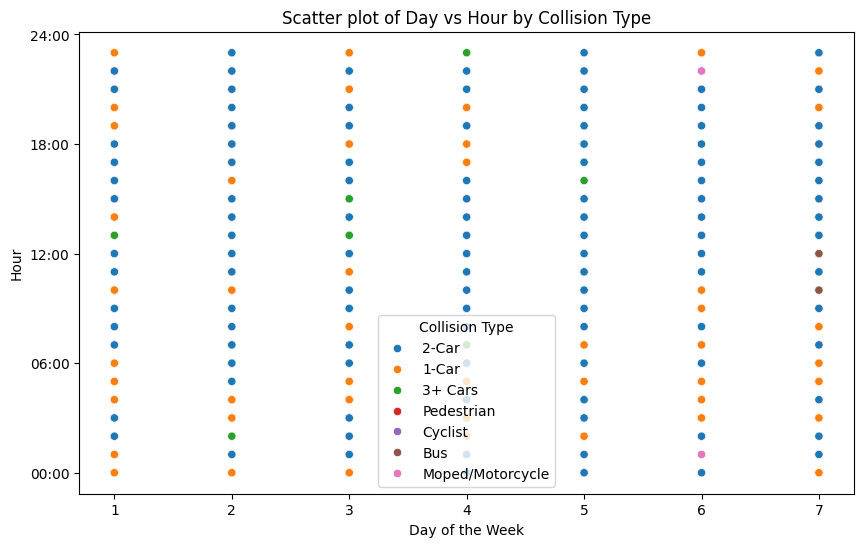

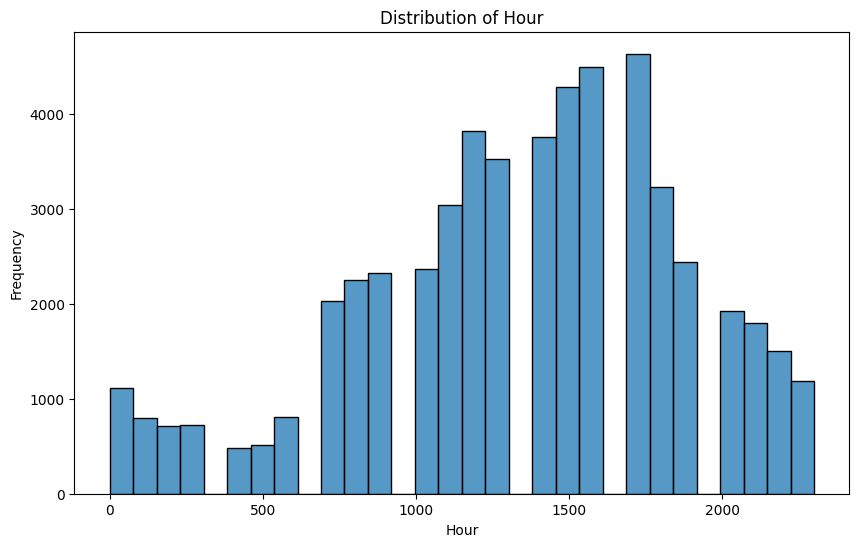

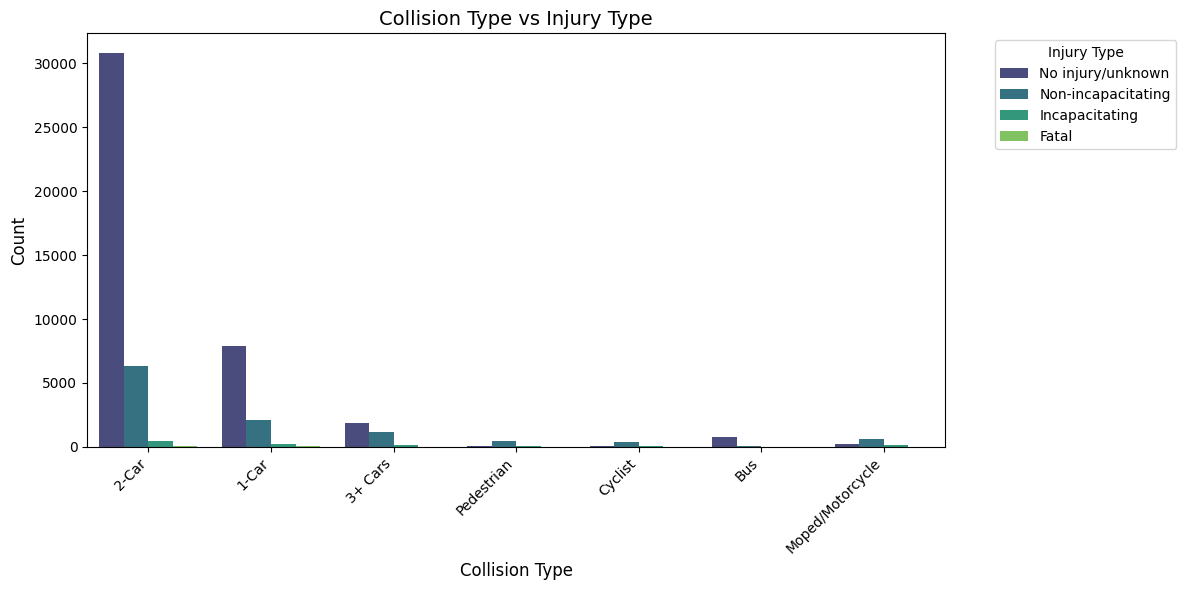

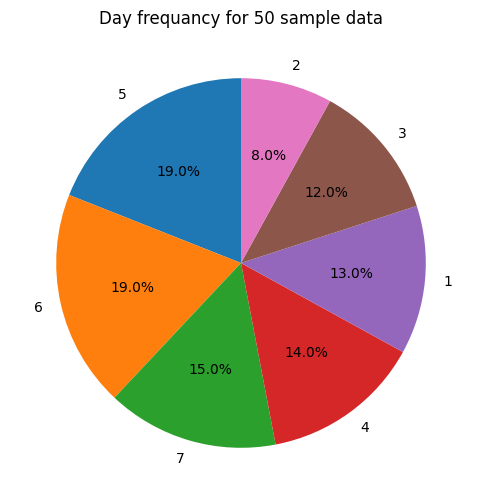

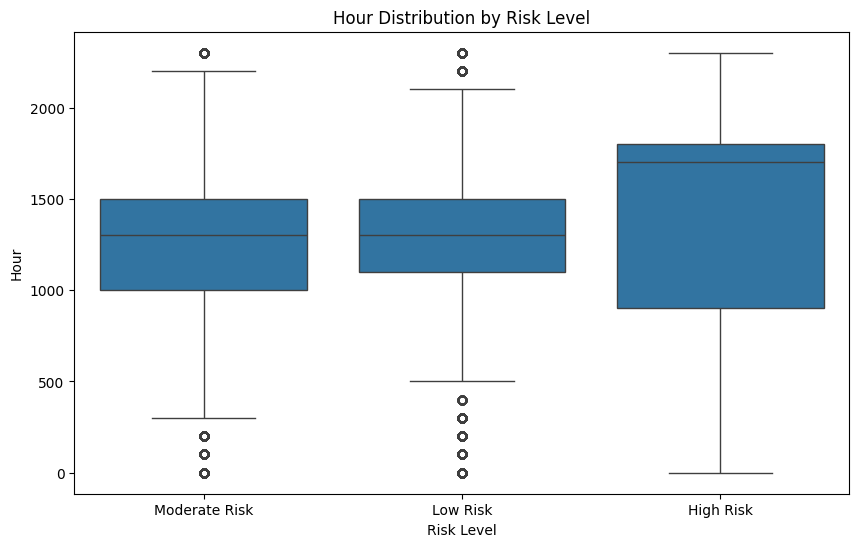

In [13]:
# Visualizations // graphs and tables show variables distribution

    # Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Day', y='Hour', data=data1, hue='Collision Type')
plt.title('Scatter plot of Day vs Hour by Collision Type')
plt.xlabel('Day of the Week')
plt.ylabel('Hour')
plt.yticks([0, 600, 1200, 1800, 2400], ['00:00', '06:00', '12:00', '18:00', '24:00']) #newly added
plt.show()

    # Histogram 
plt.figure(figsize=(10, 6))
sns.histplot(data1['Hour'], bins=30)
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show() 

# Bar plot showing the frequency of each Collision Type and Injury Type
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=data1, x='Collision Type', hue='Injury Type', palette='viridis')

# Add title and labels
plt.title('Collision Type vs Injury Type', fontsize=14)
plt.xlabel('Collision Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


    # pie chart for 'Hour' column from the sample
# sample from  dataset
sampled_data = data1.sample(n=100, random_state=1) 
Day_frequancy = sampled_data['Day'].value_counts(normalize=True)*100
Day_frequancy.plot.pie(autopct='%1.1f%%', figsize=(10,6),startangle=90)
plt.ylabel('')
plt.title('Day frequancy for 50 sample data')
plt.show()

    # Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Level', y='Hour', data=data1)
plt.title('Hour Distribution by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Hour')
plt.show()


                                              < Missing Values >                                                 

In [14]:
# Missing Values
missing_values = data1.isna().sum()
print("\nMissing values in each column:\n", missing_values)
print("\nTotal number of missing values:\n", missing_values.sum())


Missing values in each column:
 Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
Risk Level              0
dtype: int64

Total number of missing values:
 1515

Missing values after imputation:
 Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
Risk Level           0
dtype: int64


                                              < Statistical summaries >                                               

In [15]:
# Statistical summaries (Central tendency measurements such as mean and variance)
numeric_data = data1.select_dtypes(include=['number'])

print("\nMean:\n", numeric_data.mean())
print("\nMedian:\n", numeric_data.median())
print("\nVariance:\n", numeric_data.var())
print("\nstander deviation:\n", numeric_data.std())
print("\nmode:\n", numeric_data.mode())


Mean:
 Year         2008.968059
Month           6.662162
Day             4.196912
Hour         1347.265349
Latitude       35.582109
Longitude     -78.619224
dtype: float64

Median:
 Year         2009.000000
Month           7.000000
Day             4.000000
Hour         1400.000000
Latitude       39.164430
Longitude     -86.530992
dtype: float64

Variance:
 Year             14.362277
Month            12.352624
Day               3.645961
Hour         281477.017532
Latitude        127.390581
Longitude       622.534718
dtype: float64

stander deviation:
 Year           3.789760
Month          3.514630
Day            1.909440
Hour         530.544077
Latitude      11.286744
Longitude     24.950646
dtype: float64

mode:
    Year  Month  Day    Hour  Latitude  Longitude
0  2003     10    6  1700.0       0.0        0.0


                                              < variable transformation >                                               


Outliers:
        Year  Month  Day  Weekend?      Hour  Collision Type  Injury Type  \
0      2015      1    5         0  0.000000               1            2   
43     2015      1    4         0  0.000000               0            2   
57     2015      1    7         1  0.000000               1            2   
73     2015      1    4         0  0.000000               1            1   
82     2015      1    1         1  0.043478               1            2   
...     ...    ...  ...       ...       ...             ...          ...   
53683  2003      5    7         1  0.086957               1            2   
53694  2003      6    7         1  0.043478               1            3   
53701  2003      7    6         0  0.000000               1            2   
53752  2003      2    7         1  0.086957               1            2   
53846  2003     11    5         0  0.043478               1            2   

       Primary Factor  Reported_Location  Latitude  Longitude     Risk Leve

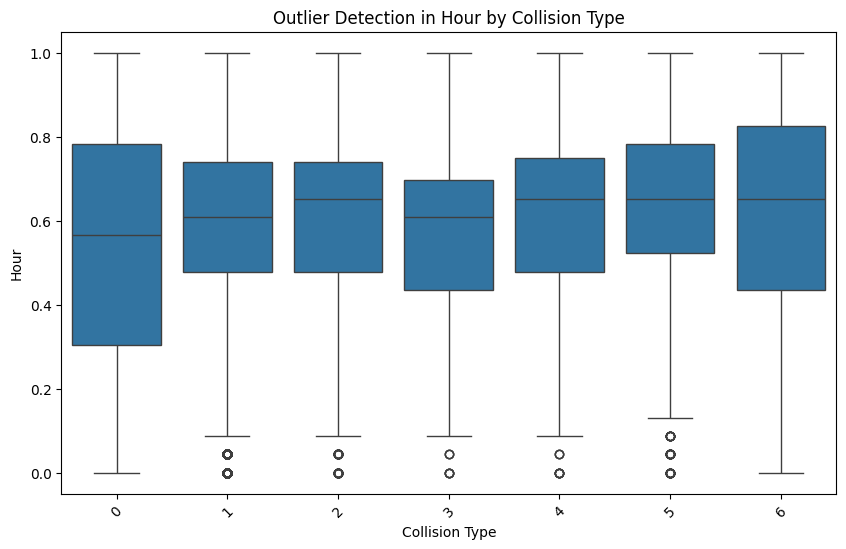

In [16]:
   
 # Imputation of Missing Values
   # 1. Impute missing values for categorical columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data1[['Weekend?', 'Collision Type', 'Primary Factor', 'Reported_Location']] = imputer_cat.fit_transform(data1[['Weekend?', 'Collision Type', 'Primary Factor', 'Reported_Location']])

   # 2. Impute missing values for numeric columns with mean
imputer_num = SimpleImputer(strategy='mean')
data1[['Hour', 'Latitude', 'Longitude']] = imputer_num.fit_transform(data1[['Hour', 'Latitude', 'Longitude']])

   # 3. Create a new Date column from Year, Month, and Day
#data1['Date'] = pd.to_datetime(data1[['Year', 'Month', 'Day']])

  # 4. Drop the original Year, Month, and Day columns coz you create Date column
#data1.drop(columns=['Year', 'Month', 'Day'], inplace=True)


      # -Check missing values again
missing_values = data1.isna().sum()
print("\nMissing values after imputation:\n", missing_values)


 # Encoding 
le = LabelEncoder()
data1['Weekend?']= le.fit_transform(data1['Weekend?']) 
data1['Collision Type'] = le.fit_transform(data1['Collision Type'])
data1['Injury Type'] = le.fit_transform(data1['Injury Type'])
data1['Primary Factor'] = le.fit_transform(data1['Primary Factor'])
data1['Reported_Location'] = le.fit_transform(data1['Reported_Location'])


   # Discretization 
data1['Hour_Bin'] = pd.cut(data1['Hour'], bins=[0, 600, 1200, 1800, 2400], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False) 
#drop hour?

  # Encode 'Hour_Bin'
data1['Hour_Bin'] = le.fit_transform(data1['Hour_Bin'])

   # Normalization of Latitude and Longitude
scaler = MinMaxScaler()
data1[['Hour','Latitude', 'Longitude']] = scaler.fit_transform(data1[['Hour','Latitude', 'Longitude']])


   # Detect Outlier in 'Hour' column
threshold = 2

        # -Calculate mean and standard deviation of the 'Hour' column
mean_hour = data1['Hour'].mean()
std_hour = data1['Hour'].std()

        # -Detect outliers
outliers = data1[data1['Hour'].apply(lambda x: abs(x - mean_hour) > threshold * std_hour)]
print("\nOutliers:\n", outliers)

        # -Visualization for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=data1, x='Collision Type', y='Hour')
plt.title('Outlier Detection in Hour by Collision Type')
plt.xticks(rotation=45)
plt.show()

                                                 < Feature Selection >                                                 

In [ ]:
# Separate class label
X = data1.drop(['Risk Level'], axis=1)  # Drop 'Risk Level' (target) from features
y = data1['Risk Level']  # Target variable

# 1. Compute correlation matrix and threshold to find highly correlated columns
corr_matrix = X.corr()
corr_threshold = 0.8
high_corr = corr_matrix[(corr_matrix.abs() > corr_threshold) & (corr_matrix != 1.0)]

# Drop one feature from each correlated pair
to_drop = [col for col in high_corr.columns if any(high_corr[col].abs() > corr_threshold)]
X_reduced = X.drop(columns=to_drop)

# 2. SelectKBest
selector = SelectKBest(score_func=chi2, k=10)  
X_new = selector.fit_transform(X_reduced, y)

selected_features = selector.get_support(indices=True)
print("\nSelected Features using SelectKBest:\n", X_reduced.columns[selected_features])

# 3. Apply Variance Threshold
# Set the threshold to eliminate features with low variance (0.01)
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

# Fit the selector to the reduced feature data and transform
X_reduced = selector.fit_transform(X_reduced)

# Get the indices of selected features
selected_features = selector.get_support(indices=True)
print("\nSelected Features based on Variance Threshold:\n", X_reduced.columns[selected_features])

# 4. Wrapper feature selection: Recursive Feature Elimination
model = LogisticRegression(max_iter=500, solver='saga')

# Choose the number of features to select (e.g., 6)
num_features_to_select = 6
selector = RFE(estimator=model, n_features_to_select=num_features_to_select)

# Fit the RFE model
selector.fit(X_reduced, y)

# Get selected features
selected_features = selector.get_support(indices=True)

# Print the selected feature names
print("\nSelected Features based on RFE:\n", X.columns[selected_features])
print("\nFeature Ranking:\n", selector.ranking_)

# Encoding the target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)  # Encode target variable

# 4. Embedded feature selection: L1 Regularization
lasso = Lasso(alpha=0.1, random_state=42)

# Fit the model
lasso.fit(X_reduced, y_encoded)  # Use the encoded target variable

# Use SelectFromModel to identify important features
selector = SelectFromModel(lasso, prefit=True)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features based on L1 Regularization:", selected_features)


                                                <Final Data Information >                                          

In [ ]:
# Final data info
print(data1.info())
print(data1.describe())  